In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

#importo libreria panda per leggere ed elaborare csv
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


train_data=pd.read_csv('/Users/tomma/Downloads/ProgettoMLDM-main (5)/train_data.csv')
test_data=pd.read_csv('/Users/tomma/Downloads/ProgettoMLDM-main (5)/test_data.csv')
y_train=pd.read_csv('/Users/tomma/Downloads/ProgettoMLDM-main (5)/train_y.csv')
y_test=pd.read_csv('/Users/tomma/Downloads/ProgettoMLDM-main (5)/test_y.csv')

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
base_estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                                      min_samples_leaf=20, min_samples_split=6, random_state=30)

In [10]:
#bagging con parametri di default:  n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True
bag_clf = BaggingClassifier(estimator=base_estimator, n_jobs=-1,verbose=10,random_state=10)
bag_clf.fit(train_data, np.ravel(y_train))


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.3s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.5s finished


BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                   criterion='entropy',
                                                   max_depth=20,
                                                   min_samples_leaf=20,
                                                   min_samples_split=6,
                                                   random_state=30),
                  n_jobs=-1, random_state=10, verbose=10)

In [11]:
bag_clf.score(test_data,y_test)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Batch computation too fast (0.0270s.) Setting batch_size=2.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


0.8697606861253285

In [53]:
print(bag_clf.get_params)

<bound method BaseEstimator.get_params of BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                   criterion='entropy',
                                                   max_depth=20,
                                                   min_samples_leaf=20,
                                                   min_samples_split=6,
                                                   random_state=10),
                  n_jobs=-1, verbose=10)>


In [5]:
#BAGGING: RICERCA N_ESTIMATOR MIGLIORE
column = ['n_estimators','estimator','accuracy']
def plot_nEstimatorVSaccuracy(nEstimators,title):
  accs = pd.DataFrame(columns=column)
  for e in nEstimators:
    bagclass = BaggingClassifier(estimator=base_estimator, n_jobs=-1,verbose=10, n_estimators=e,random_state=10)
    bagclass.fit(train_data, np.ravel(y_train))
    testset_score = bagclass.score(test_data, np.ravel(y_test))
    row = pd.DataFrame(data=[[e,base_estimator,testset_score]], columns=column)
    accs = pd.concat([accs, row])

  # plot
  fig, ax = plt.subplots()
  ax.plot(accs.n_estimators, accs.accuracy)

  ax.set(xlabel='n_estimators', ylabel='Accuracy',
        title=title)
  ax.grid()
  plt.show()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.7s remaining:    1.8s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Batch computation too fast (0.0260s.) Setting batch_size=2.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1

[Parallel(n_jobs=16)]: Batch computation too fast (0.1902s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.8s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    6.5s remaining:   28.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    6.7s remaining:   14.9s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    7.1s remaining:    9.2s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   12.6s remaining:   54.8s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   12.8s remaining:   28.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   12.8s remaining:   16.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   12.9s remaining:   10.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   12.9s remaining:    5.8s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   13.0s remaining:    2.9s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   13.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.3s remaining:    1.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | e

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.5s remaining:    2.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.5s remaining:    1.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   18.8s remaining:  1.4min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   19.3s remaining:   42.5s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   19.4s remaining:   25.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   19.5s remaining:   15.1s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   24.3s remaining:  1.8min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   24.7s remaining:   54.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   24.7s remaining:   31.8s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   25.0s remaining:   19.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   25.2s remaining:   11.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   25.2s remaining:    5.7s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   25.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.7s remaining:    3.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.7s remaining:    1.8s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.8s remaining:    3.9s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.9s remaining:    2.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    1.0s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   30.9s remaining:  2.2min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   31.3s remaining:  1.2min
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   31.4s remaining:   40.3s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   31.5s remaining:   24.4s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   36.5s remaining:  2.6min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   36.6s remaining:  1.3min
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   36.9s remaining:   47.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   37.0s remaining:   28.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   37.6s remaining:   17.1s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   38.0s remaining:    8.7s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   39.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1.0s remaining:    4.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    1.1s remaining:    2.5s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    1.2s remaining:    1.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1.2s remaining:    5.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    1.2s remaining:    2.9s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    1.3s remaining:    1.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    1.4s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    1.4s remaining:    0.6s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   43.0s remaining:  3.1min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   43.0s remaining:  1.6min
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   43.0s remaining:   55.4s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   43.4s remaining:   33.7s
[Parallel(n_jobs=16)]: Done  11 out of  16

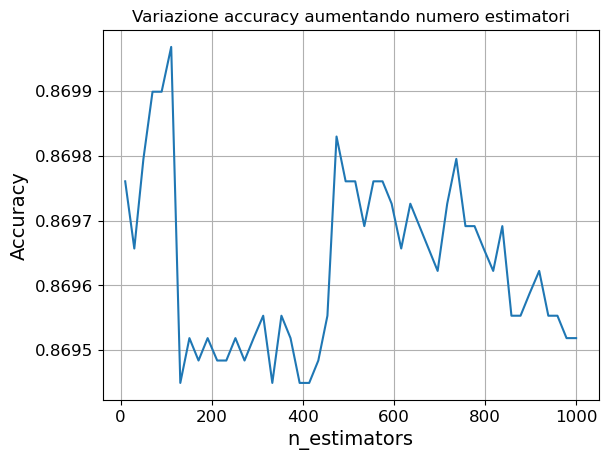

In [76]:
n_estimators = np.linspace(10, 1000, 50, dtype=int)

plot_nEstimatorVSaccuracy(n_estimators,  'Variazione accuracy aumentando numero estimatori')

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    6.1s remaining:   26.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    6.1s remaining:   13.5s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    6.1s remaining:    7.9s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    6.3s remaining:    4.8s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    6.4s remaining:    2.9s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    6.5s remaining:    1.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    6.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0761s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    2.9s remaining:    3.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    2.9s remaining:    2.2s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    2.9s remaining:    1.3s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0911s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  

[Parallel(n_jobs=16)]: Batch computation too fast (0.0901s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.0s remaining:   13.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    3.0s remaining:    6.8s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    3.1s remaining:    4.0s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.2s remaining:   14.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    3.3s remaining:    7.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    3.3s remaining:    4.3s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    3.3s remaining:    2.6s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    3.4s remaining:    1.5s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    3.6s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1191s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    3.6s remaining:    1.6s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    3.7s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1071s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend w

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1101s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.6s remaining:   15.8s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    3.7s remaining:    8.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.7s remaining:   16.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    4.2s remaining:    9.5s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    4.3s remaining:    5.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    4.3s remaining:    3.3s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    4.3s remaining:    1.9s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1341s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    4.7s remaining:    2.1s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    4.7s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1061s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend w

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1431s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.3s remaining:   18.9s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Batch computation too fast (0.1371s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    5.0s remaining:   21.8s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    5.0s remaining:   11.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    5.1s remaining:    6.6s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    5.0s remaining:   22.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    5.0s remaining:   11.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    5.1s remaining:    6.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    5.3s remaining:    4.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    5.8s remaining:    1.3s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1581s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    5.7s remaining:    4.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    5.7s remaining:    2.6s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    5.9s remaining:    1.3s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1581s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    6.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1652s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    5.7s remaining:   24.9s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Batch computation too fast (0.1812s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    6.0s remaining:   26.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    6.0s remaining:   13.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    6.3s remaining:    8.1s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    6.4s remaining:   28.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    6.5s remaining:   14.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    6.5s remaining:    8.3s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    6.6s remaining:    5.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    6.6s remaining:    2.9s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    6.6s remaining:    1.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    7.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1752s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    7.2s remaining:    1.6s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    7.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1722s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed: 

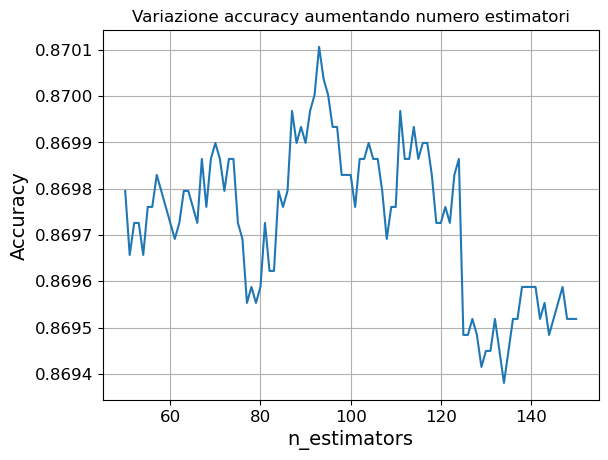

In [6]:
n_estimators = np.linspace(50, 150, 100, dtype=int)

plot_nEstimatorVSaccuracy(n_estimators,  'Variazione accuracy aumentando numero estimatori')

In [8]:
# Definisci il classificatore Bagging con DecisionTreeClassifier come base_estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator)

# Definisci il dizionario dei parametri da cercare
parameters = {
    'n_estimators': [90,91,92,93,94,95,96],
    'bootstrap': [True],
    'n_jobs': [-1],
    'verbose': [3],
    'random_state': [10]
}

# Creazione del dizionario di scoring
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Esecuzione della GridSearchCV
grid_search = GridSearchCV(
    estimator=bagging_classifier,
    param_grid=parameters,
    cv=2,  # Numero di fold per la cross-validation
    scoring=SCORING,  # Tipo di scoring
    n_jobs=-1,  # Utilizza tutti i core della CPU
    refit="balanced_accuracy",
    verbose=4,
)

grid_search.fit(train_data, np.ravel(y_train))



Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.5s remaining:   19.9s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    4.6s remaining:    3.6s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    7.7s finished


GridSearchCV(cv=2,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                                          criterion='entropy',
                                                                          max_depth=20,
                                                                          min_samples_leaf=20,
                                                                          min_samples_split=6)),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'n_estimators': [90, 91, 92, 93, 94, 95, 96],
                         'n_jobs': [-1], 'random_state': [10], 'verbose': [3]},
             refit='balanced_accuracy',
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=4)

In [10]:
# Visualizza i parametri migliori
bag_clf = grid_search.best_estimator_
print(bag_clf)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {}".format(grid_search.best_score_))
print("Score on testset: {}".format(bag_clf.score(test_data, np.ravel(y_test))))


BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                   criterion='entropy',
                                                   max_depth=20,
                                                   min_samples_leaf=20,
                                                   min_samples_split=6),
                  n_estimators=94, n_jobs=-1, random_state=10, verbose=3)
Best parameters: {'bootstrap': True, 'n_estimators': 94, 'n_jobs': -1, 'random_state': 10, 'verbose': 3}
Best score: 0.7445549478833


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished


Score on testset: 0.870037349564255


In [30]:
column = ['max_samples','estimator','accuracy']
def plot_maxSamplesVSaccuracy(max_samples,title):
  accs = pd.DataFrame(columns=column)
  for n in max_samples:
    bagclass = BaggingClassifier(estimator=base_estimator, n_jobs=-1,verbose=10, n_estimators=94, max_samples=n,random_state=10)
    bagclass.fit(train_data, np.ravel(y_train))
    testset_score = bagclass.score(test_data, np.ravel(y_test))
    row = pd.DataFrame(data=[[n,base_estimator,testset_score]], columns=column)
    accs = pd.concat([accs, row])

  # plot
  fig, ax = plt.subplots()
  ax.plot(accs.max_samples, accs.accuracy)

  ax.set(xlabel='max_samples', ylabel='Accuracy',
        title=title)
  ax.grid()
  plt.show()

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.7s remaining:    3.3s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.7s remaining:    1.7s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1281s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Batch computation too fast (0.1311s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1.4s remaining:    6.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    1.5s remaining:    3.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    1.5s remaining:    1.9s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    2.0s remaining:    9.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    2.0s remaining:    4.6s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    2.0s remaining:    2.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    2.0s remaining:    1.6s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    2.0s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    2.1s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1204s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Batch computation too fast (0.1270s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    2.6s remaining:   11.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    2.6s remaining:    5.8s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    2.6s remaining:    3.3s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.0s remaining:   13.3s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    3.0s remaining:    6.8s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    3.1s remaining:    4.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    3.1s remaining:    2.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    3.1s remaining:    1.3s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    3.1s remaining:    0.6s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1351s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1371s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.4s remaining:   15.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    3.5s remaining:    7.7s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.8s remaining:   17.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    3.9s remaining:    8.7s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    3.9s remaining:    5.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    3.9s remaining:    3.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    3.9s remaining:    1.7s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    4.0s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1341s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1321s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.2s remaining:   18.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    4.3s remaining:    9.5s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

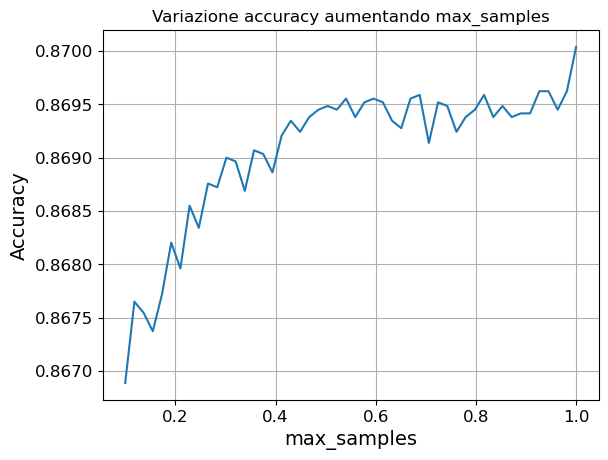

In [31]:
max_samples = np.linspace(0.1, 1.0, dtype=float)

plot_maxSamplesVSaccuracy(max_samples,  'Variazione accuracy aumentando max_samples')

In [34]:
# Definisci il classificatore Bagging con DecisionTreeClassifier come base_estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator)

# Definisci il dizionario dei parametri da cercare
parameters = {
    'n_estimators': [94],
    'max_samples': [0.1, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0],
    'bootstrap': [True],
    'n_jobs': [-1],
    'verbose': [10],
    'random_state': [10],
}

# Creazione del dizionario di scoring
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Esecuzione della GridSearchCV
grid_search = GridSearchCV(
    estimator=bagging_classifier,
    param_grid=parameters,
    cv=2,  # Numero di fold per la cross-validation
    scoring=SCORING,  # Tipo di scoring
    n_jobs=-1,  # Utilizza tutti i core della CPU
    refit="accuracy",
    verbose=10,

)

grid_search.fit(train_data, np.ravel(y_train))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.5s remaining:   19.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    4.5s remaining:   10.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    4.7s remaining:    6.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    4.8s remaining:    3.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    4.8s remaining:    2.1s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.1s finished


GridSearchCV(cv=2,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                                          criterion='entropy',
                                                                          max_depth=20,
                                                                          min_samples_leaf=20,
                                                                          min_samples_split=6,
                                                                          random_state=30)),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                         0.9, 1.0],
                         'n_estimators': [94], 'n_jobs': [-1],
                         'random_state': [10], 'verbose': [10]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=10)

In [35]:
# Visualizza i parametri migliori
bag_clf = grid_search.best_estimator_
print(bag_clf)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {}".format(grid_search.best_score_))
print("Score on testset: {}".format(bag_clf.score(test_data, np.ravel(y_test))))

BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                   criterion='entropy',
                                                   max_depth=20,
                                                   min_samples_leaf=20,
                                                   min_samples_split=6,
                                                   random_state=30),
                  n_estimators=94, n_jobs=-1, random_state=10, verbose=10)
Best parameters: {'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 94, 'n_jobs': -1, 'random_state': 10, 'verbose': 10}
Best score: 0.8692374200242089


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1131s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished


Score on testset: 0.870037349564255


In [24]:
column = ['max_features','estimator','accuracy']
def plot_maxFeaturesVSaccuracy(max_features,title):
  accs = pd.DataFrame(columns=column)
  for n in max_features:
    bagclass = BaggingClassifier(estimator=base_estimator, n_jobs=2,verbose=10, n_estimators=94, max_samples=1.0,max_features=n,random_state=10)
    bagclass.fit(train_data, np.ravel(y_train))
    testset_score = bagclass.score(test_data, np.ravel(y_test))
    row = pd.DataFrame(data=[[n,base_estimator,testset_score]], columns=column)
    accs = pd.concat([accs, row])

  # plot
  fig, ax = plt.subplots()
  ax.plot(accs.max_features, accs.accuracy)

  ax.set(xlabel='max_features', ylabel='Accuracy',
        title=title)
  ax.grid()
  plt.show()

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1982s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.9s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0280s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.4s remaining:    2.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0421s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    1.0s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0350s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  

[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0530s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend w

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0711s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1.8s remaining:    8.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    1.8s remaining:    4.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    2.5s remaining:   11.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    2.7s remaining:    6.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    2.8s remaining:    3.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    2.8s remaining:    2.2s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    2.9s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0841s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    3.3s remaining:    4.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    3.3s remaining:    2.6s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    3.4s remaining:    1.5s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    3.4s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0851s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  

[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    3.8s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1041s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1331s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished


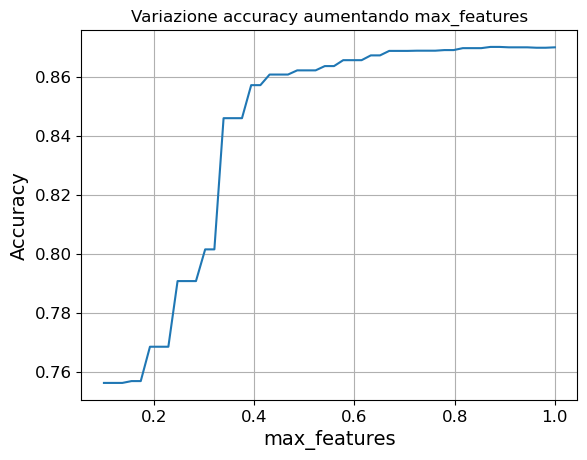

In [35]:
max_features = np.linspace(0.1, 1.0, dtype=float)

plot_maxFeaturesVSaccuracy(max_features,  'Variazione accuracy aumentando max_features')

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   17.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   17.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   15.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   15.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Don

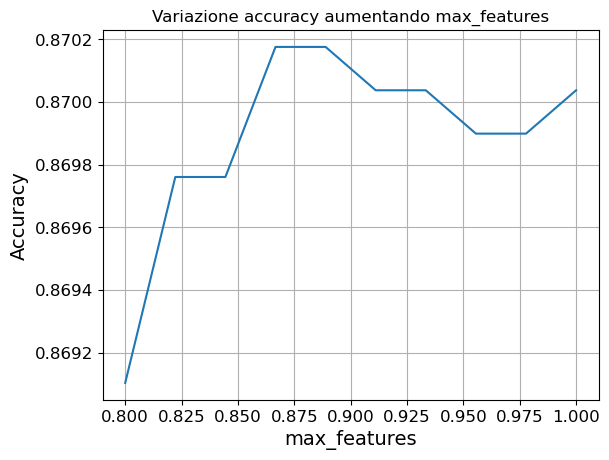

In [25]:
max_features = np.linspace(0.8, 1.0, 10,dtype=float)

plot_maxFeaturesVSaccuracy(max_features,  'Variazione accuracy aumentando max_features')

In [26]:
# Definisci il classificatore Bagging con DecisionTreeClassifier come base_estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator)

# Definisci il dizionario dei parametri da cercare
parameters = {
    'n_estimators': [94],
    'max_samples': [1.0],
    'max_features': [0.87,0.875,0.88],
    'bootstrap': [True],
    'n_jobs': [-1],
    'verbose': [10],
    'random_state': [10],
}

# Creazione del dizionario di scoring
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Esecuzione della GridSearchCV
grid_search = GridSearchCV(
    estimator=bagging_classifier,
    param_grid=parameters,
    cv=2,  # Numero di fold per la cross-validation
    scoring=SCORING,  # Tipo di scoring
    n_jobs=-1,  # Utilizza tutti i core della CPU
    refit="accuracy",
    verbose=10,

)

grid_search.fit(train_data, np.ravel(y_train))

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.7s remaining:   16.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    3.9s remaining:    8.8s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    5.6s remaining:    7.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    5.6s remaining:    4.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    5.7s remaining:    2.5s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    5.7s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.9s finished


GridSearchCV(cv=2,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                                          criterion='entropy',
                                                                          max_depth=20,
                                                                          min_samples_leaf=20,
                                                                          min_samples_split=6,
                                                                          random_state=30)),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': [0.87, 0.875, 0.88],
                         'max_samples': [1.0], 'n_estimators': [94],
                         'n_jobs': [-1], 'random_state': [10],
                         'verbose': [10]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=10)

In [27]:
# Visualizza i parametri migliori
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.score(train_data,np.ravel(y_train)))
best_dtc = grid_search.best_estimator_
best_dtc.score(test_data,y_test)

Best Parameters: {'bootstrap': True, 'max_features': 0.87, 'max_samples': 1.0, 'n_estimators': 94, 'n_jobs': -1, 'random_state': 10, 'verbose': 10}


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.4s remaining:    2.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.6s finished


Best Score: 0.8719263358118624


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1267s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished


0.8701756812837184

In [28]:
#bagging con out-of-bag evaluation e parametri trovati con gridsearch
outbag_clf = BaggingClassifier(estimator=base_estimator, n_estimators=94,
    max_samples=1.0, max_features=0.87, bootstrap=True, oob_score=True, random_state=10, n_jobs=6)
outbag_clf.fit(train_data, np.ravel(y_train))
outbag_clf.oob_score_

0.8700933771398928

In [17]:
#PASTING: RICERCA MAX_SAMPLES MIGLIORE
column = ['max_samples','estimator','accuracy']
def plot_maxSamplesVSaccuracyWithoutRepl(max_samples,title):
  accs = pd.DataFrame(columns=column)
  for n in max_samples:
    bagclass = BaggingClassifier(estimator=base_estimator, n_jobs=-1,verbose=10, n_estimators=94, max_samples=n,random_state=10,bootstrap=False)
    bagclass.fit(train_data, np.ravel(y_train))
    testset_score = bagclass.score(test_data, np.ravel(y_test))
    row = pd.DataFrame(data=[[n,base_estimator,testset_score]], columns=column)
    accs = pd.concat([accs, row])

  # plot
  fig, ax = plt.subplots()
  ax.plot(accs.max_samples, accs.accuracy)

  ax.set(xlabel='max_samples', ylabel='Accuracy',
        title=title)
  ax.grid()
  plt.show()

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.2s remaining:   18.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    4.3s remaining:    9.5s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    4.3s remaining:    5.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    4.3s remaining:    3.3s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    4.3s remaining:    1.9s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1421s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Batch computation too fast (0.1442s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1.6s remaining:    7.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    1.6s remaining:    3.7s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    1.7s remaining:    2.2s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    2.3s remaining:   10.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    2.4s remaining:    5.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    2.4s remaining:    3.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    2.4s remaining:    1.8s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    2.4s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1491s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1431s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.2s remaining:   14.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.0s remaining:   17.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    4.0s remaining:    9.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    4.1s remaining:    5.3s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    4.1s remaining:    3.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    4.1s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1371s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1411s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.8s remaining:   21.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Batch computation too fast (0.1251s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    5.5s remaining:   24.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    5.5s remaining:   12.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    5.5s remaining:    7.2s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    6.3s remaining:   27.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    6.3s remaining:   14.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    6.4s remaining:    8.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    6.4s remaining:    4.9s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    6.4s remaining:    2.8s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    6.4s remaining:    1.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    6.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1181s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  

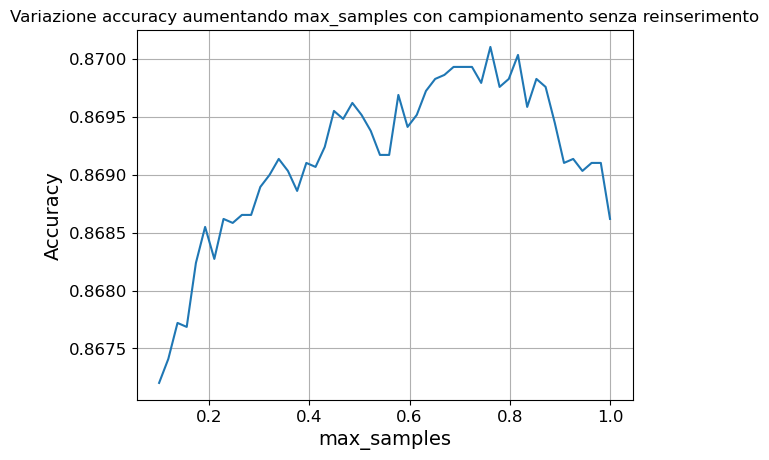

In [18]:
max_samples = np.linspace(0.1, 1.0, dtype=float)

plot_maxSamplesVSaccuracyWithoutRepl(max_samples,  'Variazione accuracy aumentando max_samples con campionamento senza reinserimento')

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.7s remaining:   20.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    4.8s remaining:   10.6s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    4.8s remaining:    6.3s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    4.9s remaining:    3.8s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    4.9s remaining:    2.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    4.9s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1382s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1259s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.9s remaining:   21.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    5.0s remaining:   22.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    5.1s remaining:   11.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    5.1s remaining:    6.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    5.2s remaining:    4.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1221s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    5.5s remaining:    4.2s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    5.5s remaining:    2.5s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    5.6s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1161s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  

[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    5.7s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1251s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Batch computation too fast (0.1201s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    5.6s remaining:   24.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    5.6s remaining:   12.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    5.6s remaining:    7.3s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    5.8s remaining:   25.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    5.9s remaining:   13.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    5.9s remaining:    7.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    5.9s remaining:    4.6s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    6.0s remaining:    2.7s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    6.1s remaining:    1.3s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1341s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    6.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1061s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    6.0s remaining:   26.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed: 

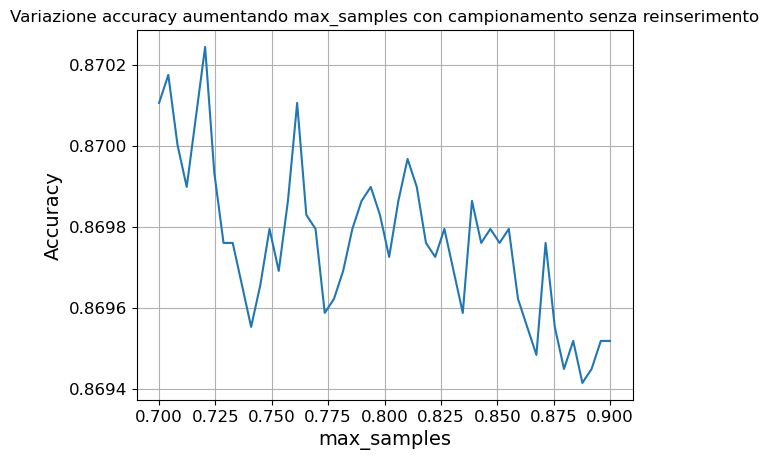

In [19]:
max_samples = np.linspace(0.7, 0.9, dtype=float)

plot_maxSamplesVSaccuracyWithoutRepl(max_samples,  'Variazione accuracy aumentando max_samples con campionamento senza reinserimento')

In [37]:
# Definisci il classificatore Bagging con DecisionTreeClassifier come base_estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator)

# Definisci il dizionario dei parametri da cercare
parameters = {
    'n_estimators': [94],
    'max_samples': [0.715, 0.716, 0.717, 0.718, 0.719, 0.720, 0.721, 0.722],
    'bootstrap': [False],
    'n_jobs': [-1],
    'verbose': [10],
    'random_state': [10],
}

# Creazione del dizionario di scoring
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Esecuzione della GridSearchCV
grid_search = GridSearchCV(
    estimator=bagging_classifier,
    param_grid=parameters,
    cv=2,  # Numero di fold per la cross-validation
    scoring=SCORING,  # Tipo di scoring
    n_jobs=-1,  # Utilizza tutti i core della CPU
    refit="accuracy",
    verbose=10,

)

grid_search.fit(train_data, np.ravel(y_train))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.9s remaining:   21.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    5.0s remaining:   11.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    5.2s remaining:    6.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    5.2s remaining:    4.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    5.7s remaining:    2.5s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    5.7s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.8s finished


GridSearchCV(cv=2,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                                          criterion='entropy',
                                                                          max_depth=20,
                                                                          min_samples_leaf=20,
                                                                          min_samples_split=6,
                                                                          random_state=30)),
             n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_samples': [0.715, 0.716, 0.717, 0.718, 0.719,
                                         0.72, 0.721, 0.722],
                         'n_estimators': [94], 'n_jobs': [-1],
                         'random_state': [10], 'verbose': [10]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=10)

In [38]:
# Visualizza i parametri migliori
bag_clf = grid_search.best_estimator_
print(bag_clf)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {}".format(grid_search.best_score_))
print("Score on testset: {}".format(bag_clf.score(test_data, np.ravel(y_test))))

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                   criterion='entropy',
                                                   max_depth=20,
                                                   min_samples_leaf=20,
                                                   min_samples_split=6,
                                                   random_state=30),
                  max_samples=0.719, n_estimators=94, n_jobs=-1,
                  random_state=10, verbose=10)
Best parameters: {'bootstrap': False, 'max_samples': 0.719, 'n_estimators': 94, 'n_jobs': -1, 'random_state': 10, 'verbose': 10}
Best score: 0.8691509597094933


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1211s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished


Score on testset: 0.8698990178447918


In [21]:
#PASTING: RICERCA N_ESTIMATOR MIGLIORE
column = ['n_estimators','estimator','accuracy']
def plot_nEstimatorVSaccuracyWithoutRepl(nEstimators,title):
  accs = pd.DataFrame(columns=column)
  for e in nEstimators:
    bagclass = BaggingClassifier(estimator=base_estimator, max_samples=0.719, n_jobs=-1,verbose=10, n_estimators=e,random_state=10, bootstrap=False)
    bagclass.fit(train_data, np.ravel(y_train))
    testset_score = bagclass.score(test_data, np.ravel(y_test))
    row = pd.DataFrame(data=[[e,base_estimator,testset_score]], columns=column)
    accs = pd.concat([accs, row])

  # plot
  fig, ax = plt.subplots()
  ax.plot(accs.n_estimators, accs.accuracy)

  ax.set(xlabel='n_estimators', ylabel='Accuracy',
        title=title)
  ax.grid()
  plt.show()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    3.6s remaining:    8.5s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    3.6s remaining:    3.6s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    3.6s remaining:    1.5s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    3.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Batch computation too fast (0.0280s.) Setting batch_size=2.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1

[Parallel(n_jobs=16)]: Batch computation too fast (0.1852s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    8.0s remaining:   35.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    8.2s remaining:   18.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    8.2s remaining:   10.6s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   14.5s remaining:  1.1min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   14.5s remaining:   32.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   14.7s remaining:   19.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   15.1s remaining:   11.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   15.1s remaining:    6.8s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   15.1s remaining:    3.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   15.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.3s remaining:    1.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | e

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.5s remaining:    2.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.5s remaining:    1.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   21.6s remaining:  1.6min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   21.7s remaining:   47.9s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   21.8s remaining:   28.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   22.6s remaining:   17.5s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   28.6s remaining:  2.1min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   28.7s remaining:  1.1min
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   29.1s remaining:   37.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   29.3s remaining:   22.8s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   29.5s remaining:   13.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   29.5s remaining:    6.7s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   30.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.7s remaining:    3.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.7s remaining:    1.6s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.8s remaining:    1.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.9s remaining:    4.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.9s remaining:    2.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    1.0s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   35.6s remaining:  2.6min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   35.9s remaining:  1.3min
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   36.2s remaining:   46.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   36.5s remaining:   28.3s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   42.2s remaining:  3.1min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   42.5s remaining:  1.6min
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   42.9s remaining:   55.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   43.3s remaining:   33.6s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   43.6s remaining:   19.8s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   44.1s remaining:   10.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   44.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1.0s remaining:    4.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    1.1s remaining:    2.5s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    1.1s remaining:    1.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1.2s remaining:    5.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    1.3s remaining:    3.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    1.5s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   52.7s remaining:  3.8min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   53.2s remaining:  2.0min
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   53.6s remaining:  1.1min
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   54.1s remaining:   42.1s
[Parallel(n_jobs=16)]: Done  11 out of  16

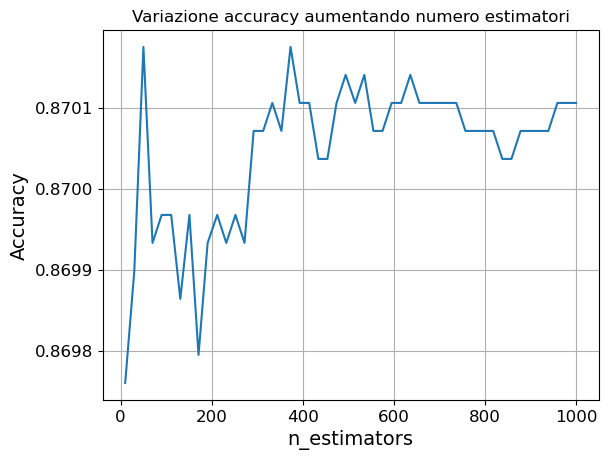

In [22]:
n_estimators = np.linspace(10, 1000, 50, dtype=int)

plot_nEstimatorVSaccuracyWithoutRepl(n_estimators,  'Variazione accuracy aumentando numero estimatori')

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Batch computation too fast (0.0190s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.8s remaining:    3.9s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.8s remaining:    2.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0400s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0500s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1.6s remaining:    7.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    1.6s remaining:    3.7s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    1.9s remaining:    8.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    2.5s remaining:    5.6s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    2.5s remaining:    3.3s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    2.6s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0791s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    3.2s remaining:    2.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    3.2s remaining:    1.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    3.2s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0971s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  

[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    4.0s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1011s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Batch computation too fast (0.1091s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.2s remaining:   18.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    4.3s remaining:    9.6s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    4.4s remaining:    5.6s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.9s remaining:   21.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    5.0s remaining:   11.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    5.0s remaining:    6.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    5.1s remaining:    4.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    5.4s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1301s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  

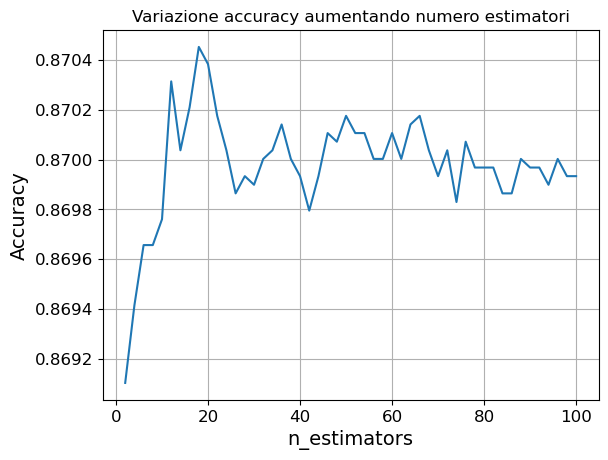

In [23]:
n_estimators = np.linspace(2, 100, dtype=int)
plot_nEstimatorVSaccuracyWithoutRepl(n_estimators,  'Variazione accuracy aumentando numero estimatori')

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   15.9s remaining:  1.2min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   16.3s remaining:   35.9s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   16.3s remaining:   21.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   16.3s remaining:   12.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   16.5s remaining:    7.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   17.0s remaining:    3.8s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   17.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.3s remaining:    1.8s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | e

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.4s remaining:    1.9s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   16.8s remaining:  1.2min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   16.9s remaining:   37.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   17.3s remaining:   22.3s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   17.4s remaining:   13.5s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   17.0s remaining:  1.2min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   17.1s remaining:   37.8s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   17.7s remaining:   22.8s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   17.9s remaining:   13.9s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   18.3s remaining:    8.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   18.4s remaining:    4.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   18.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.4s remaining:    2.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.3s remaining:    1.8s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   17.9s remaining:  1.3min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   18.2s remaining:   40.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   18.4s remaining:   23.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   19.0s remaining:   14.7s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   18.6s remaining:  1.4min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   18.7s remaining:   41.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   18.8s remaining:   24.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   19.0s remaining:   14.8s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   19.2s remaining:    8.7s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   19.5s remaining:    4.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   20.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.4s remaining:    2.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.4s remaining:    2.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   20.1s remaining:  1.5min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   20.2s remaining:   44.6s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   20.3s remaining:   26.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   20.3s remaining:   15.8s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   20.4s remaining:  1.5min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   20.8s remaining:   45.8s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   20.9s remaining:   26.9s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   21.0s remaining:   16.3s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:   21.2s remaining:    9.6s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   21.4s remaining:    4.9s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   21.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.4s remaining:    2.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  11 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.5s remaining:    2.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:   20.6s remaining:  1.5min
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:   20.9s remaining:   46.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:   21.0s remaining:   27.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:   21.3s remaining:   16.6s
[Parallel(n_jobs=16)]: Done  11 out of  16

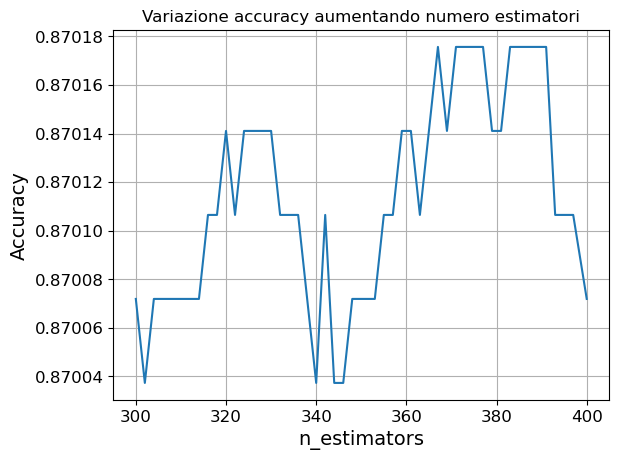

In [24]:
n_estimators = np.linspace(300, 400, dtype=int)

plot_nEstimatorVSaccuracyWithoutRepl(n_estimators,  'Variazione accuracy aumentando numero estimatori')

In [25]:
# Definisci il classificatore Bagging con DecisionTreeClassifier come base_estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator)

# Definisci il dizionario dei parametri da cercare
parameters = {
    'n_estimators': [15,16,17,18,19,20],
    'max_samples': [0.719],
    'bootstrap': [False],
    'n_jobs': [-1],
    'verbose': [10],
    'random_state': [10],
}

# Creazione del dizionario di scoring
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Esecuzione della GridSearchCV
grid_search = GridSearchCV(
    estimator=bagging_classifier,
    param_grid=parameters,
    cv=2,  # Numero di fold per la cross-validation
    scoring=SCORING,  # Tipo di scoring
    n_jobs=-1,  # Utilizza tutti i core della CPU
    refit="accuracy",
    verbose=10,

)

grid_search.fit(train_data, np.ravel(y_train))

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.8s remaining:    3.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.8s remaining:    2.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.4s finished


GridSearchCV(cv=2,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                                          criterion='entropy',
                                                                          max_depth=20,
                                                                          min_samples_leaf=20,
                                                                          min_samples_split=6,
                                                                          random_state=30)),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_samples': [0.719],
                         'n_estimators': [15, 16, 17, 18, 19, 20],
                         'n_jobs': [-1], 'random_state': [10],
                         'verbose': [10]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=10)

In [26]:
# Visualizza i parametri migliori
bag_clf = grid_search.best_estimator_
print(bag_clf)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {}".format(grid_search.best_score_))
print("Score on testset: {}".format(bag_clf.score(test_data, np.ravel(y_test))))

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                   criterion='entropy',
                                                   max_depth=20,
                                                   min_samples_leaf=20,
                                                   min_samples_split=6,
                                                   random_state=30),
                  max_samples=0.719, n_estimators=18, n_jobs=-1,
                  random_state=10, verbose=10)
Best parameters: {'bootstrap': False, 'max_samples': 0.719, 'n_estimators': 18, 'n_jobs': -1, 'random_state': 10, 'verbose': 10}
Best score: 0.8689693930485907
Score on testset: 0.8704523447226449


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0370s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


In [30]:
column = ['max_features','estimator','accuracy']
def plot_maxFeaturesVSaccuracyWithoutRepl(max_features,title):
  accs = pd.DataFrame(columns=column)
  for n in max_features:
    bagclass = BaggingClassifier(estimator=base_estimator, n_jobs=-1,verbose=10, n_estimators=18, max_samples=0.719,max_features=n,bootstrap=False,random_state=10)
    bagclass.fit(train_data, np.ravel(y_train))
    testset_score = bagclass.score(test_data, np.ravel(y_test))
    row = pd.DataFrame(data=[[n,base_estimator,testset_score]], columns=column)
    accs = pd.concat([accs, row])

  # plot
  fig, ax = plt.subplots()
  ax.plot(accs.max_features, accs.accuracy)

  ax.set(xlabel='max_features', ylabel='Accuracy',
        title=title)
  ax.grid()
  plt.show()

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0571s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0170s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Batch computation too fast (0.0981s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0190s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.1471s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0200s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.2s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.3s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0200s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0220s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.5s remaining:    2.5s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.5s remaining:    1.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.6s remaining:    0.8s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.6s remaining:    0.5s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0230s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0270s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.6s remaining:    3.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.8s remaining:    3.6s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.9s remaining:    2.1s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0290s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  

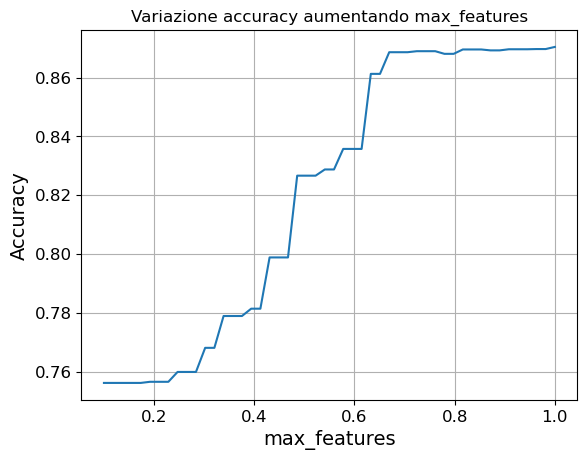

In [30]:
max_features = np.linspace(0.1, 1.0, dtype=float)

plot_maxFeaturesVSaccuracyWithoutRepl(max_features,  'Variazione accuracy aumentando max_features')

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.1s remaining:   18.3s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    4.2s remaining:    9.3s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    4.2s remaining:    5.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    4.3s remaining:    3.3s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    4.3s remaining:    1.9s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0330s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 |

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0300s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.7s remaining:    3.4s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed: 

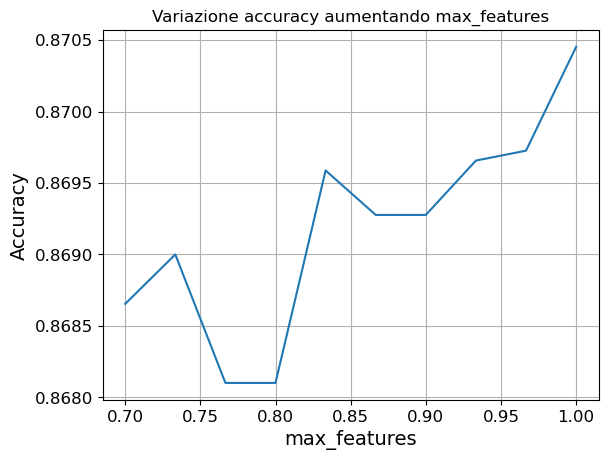

In [31]:
max_features = np.linspace(0.7, 1.0, 10,dtype=float)

plot_maxFeaturesVSaccuracyWithoutRepl(max_features,  'Variazione accuracy aumentando max_features')

In [39]:
best_pasting_clf=BaggingClassifier(bootstrap=False,estimator=base_estimator,max_samples=0.719, 
                 n_estimators=18, max_features=1.0,n_jobs=-1,random_state=10, verbose=10)
best_pasting_clf.fit(train_data, np.ravel(y_train))
print("Score on testset: {}".format(best_pasting_clf.score(test_data, np.ravel(y_test))))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.8s remaining:    3.9s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.8s remaining:    1.9s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.9s remaining:    1.1s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.5s finished


Score on testset: 0.8704523447226449


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0380s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


In [53]:
#Adaboost con 200 alberi di decisione di un solo livello
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(estimator=base_estimator,n_estimators=15, algorithm="SAMME.R", learning_rate=2, random_state=10)
ada_clf.fit(train_data, np.ravel(y_train))
y_pred = ada_clf.predict(test_data)
print(accuracy_score(y_test, y_pred))

0.8660948955595518


In [48]:
#BOOSTING: RICERCA N_ESTIMATOR MIGLIORE
from sklearn.ensemble import AdaBoostClassifier

column = ['n_estimators','estimator','accuracy']
def plot_nEstimatorVSaccuracyBoost(nEstimators,title):
  accs = pd.DataFrame(columns=column)
  for e in nEstimators:
    boostclass = AdaBoostClassifier(estimator=base_estimator, n_estimators=e,random_state=10)
    boostclass.fit(train_data, np.ravel(y_train))
    testset_score = boostclass.score(test_data, np.ravel(y_test))
    row = pd.DataFrame(data=[[e,base_estimator,testset_score]], columns=column)
    accs = pd.concat([accs, row])

  # plot
  fig, ax = plt.subplots()
  ax.plot(accs.n_estimators, accs.accuracy)

  ax.set(xlabel='n_estimators', ylabel='Accuracy',
        title=title)
  ax.grid()
  plt.show()

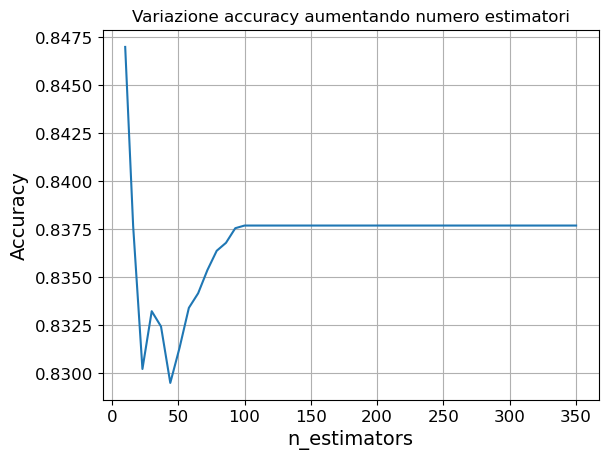

In [49]:
n_estimators = np.linspace(10, 350, 50, dtype=int)

plot_nEstimatorVSaccuracyBoost(n_estimators,  'Variazione accuracy aumentando numero estimatori')

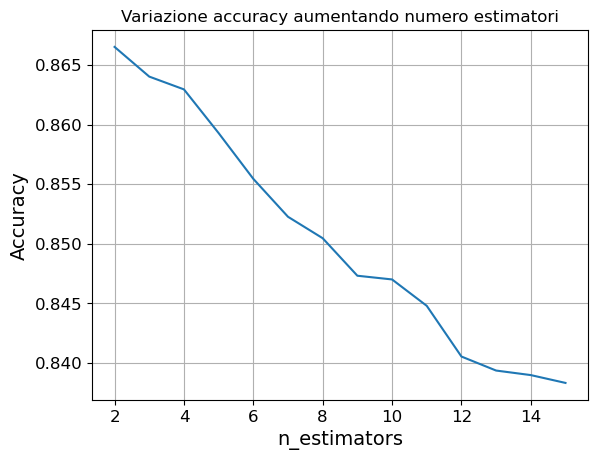

In [50]:
n_estimators = np.linspace(2, 15, 50, dtype=int)

plot_nEstimatorVSaccuracyBoost(n_estimators,  'Variazione accuracy aumentando numero estimatori')

In [1]:
#BOOSTING: RICERCA N_ESTIMATOR MIGLIORE
from sklearn.ensemble import AdaBoostClassifier

column = ['learning_rate','estimator','accuracy']
def plot_learningRateVSaccuracyBoost(nEstimators,title):
  accs = pd.DataFrame(columns=column)
  for n in learningRate:
    boostclass = AdaBoostClassifier(estimator=base_estimator, n_estimators=250,learning_rate=n,random_state=10)
    boostclass.fit(train_data, np.ravel(y_train))
    testset_score = boostclass.score(test_data, np.ravel(y_test))
    row = pd.DataFrame(data=[[n,base_estimator,testset_score]], columns=column)
    accs = pd.concat([accs, row])

  # plot
  fig, ax = plt.subplots()
  ax.plot(accs.learning_rate, accs.accuracy)

  ax.set(xlabel='learning_rate', ylabel='Accuracy',
        title=title)
  ax.grid()
  plt.show()

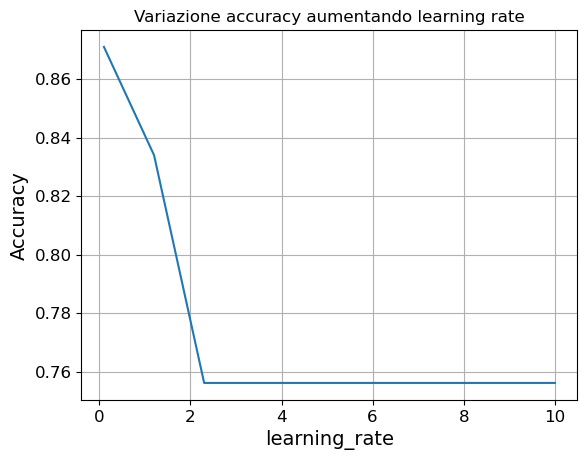

In [12]:
learningRate = np.linspace(0.1, 10.0, 10, dtype=float)

plot_learningRateVSaccuracyBoost(learningRate,  'Variazione accuracy aumentando learning rate')

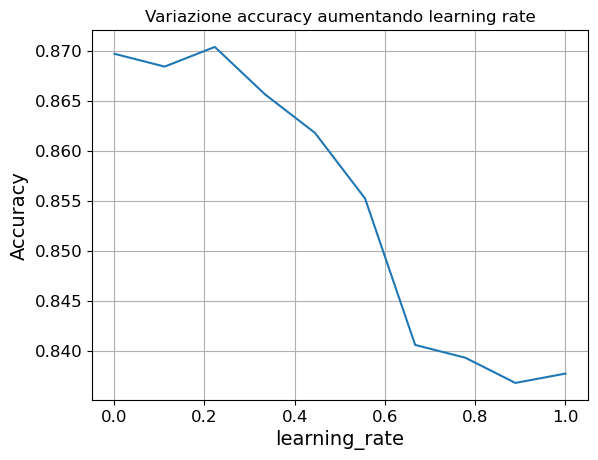

In [13]:
learningRate = np.linspace(0.001, 1.0, 10, dtype=float)

plot_learningRateVSaccuracyBoost(learningRate,  'Variazione accuracy aumentando learning rate')

In [17]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
#adaboost con cross validation



abc = AdaBoostClassifier()


# Create the parameter grids
parameter_grid = {
     "n_estimators": [250],
     "learning_rate": [0.2,0.21,0.22,0.23,0.25,0.25],
     #"algorithm": ['SAMME', 'SAMME.R'],
    # 'random_state': [5, 10, 22, 50],
     "estimator": [base_estimator],
     "random_state": [10],
}

# Create the scoring dictionary
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(
    estimator=abc,
    param_grid=parameter_grid,
    cv=2,
    verbose=3,
    scoring=SCORING,
    return_train_score=True,
    refit="balanced_accuracy",
   
)

grid_search.fit(train_data, np.ravel(y_train))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=30), learning_rate=0.2, n_estimators=250, random_state=10; accuracy: (train=1.000, test=0.856) balanced_accuracy: (train=1.000, test=0.740) f1: (train=1.000, test=0.773) total time= 1.4min
[CV 2/2] END estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=30), learning_rate=0.2, n_estimators=250, random_state=10; accuracy: (train=1.000, test=0.857) balanced_accuracy: (train=1.000, test=0.745) f1: (train=1.000, test=0.777) total time= 1.4min
[CV 1/2] END estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6

GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'estimator': [DecisionTreeClassifier(ccp_alpha=0.0001,
                                                              criterion='entropy',
                                                              max_depth=20,
                                                              min_samples_leaf=20,
                                                              min_samples_split=6,
                                                              random_state=30)],
                         'learning_rate': [0.2, 0.21, 0.22, 0.23, 0.25, 0.25],
                         'n_estimators': [250], 'random_state': [10]},
             refit='balanced_accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=3)

In [18]:
# Visualizza i parametri migliori
boost_clf = grid_search.best_estimator_
print(boost_clf)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {}".format(grid_search.best_score_))
print("Score on testset: {}".format(boost_clf.score(test_data, np.ravel(y_test))))

AdaBoostClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                    criterion='entropy',
                                                    max_depth=20,
                                                    min_samples_leaf=20,
                                                    min_samples_split=6,
                                                    random_state=30),
                   learning_rate=0.23, n_estimators=250, random_state=10)
Best parameters: {'estimator': DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=30), 'learning_rate': 0.23, 'n_estimators': 250, 'random_state': 10}
Best score: 0.7437578656451076
Score on testset: 0.8685848665098908


In [20]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
#adaboost con cross validation



abc = AdaBoostClassifier()


# Create the parameter grids
parameter_grid = {
     "n_estimators": [250],
     "learning_rate": [0.23],
     "algorithm": ['SAMME', 'SAMME.R'],
     "estimator": [base_estimator],
     "random_state": [10],
}

# Create the scoring dictionary
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(
    estimator=abc,
    param_grid=parameter_grid,
    cv=2,
    verbose=3,
    scoring=SCORING,
    return_train_score=True,
    refit="balanced_accuracy",
   
)

grid_search.fit(train_data, np.ravel(y_train))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END algorithm=SAMME, estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=30), learning_rate=0.23, n_estimators=250, random_state=10; accuracy: (train=1.000, test=0.862) balanced_accuracy: (train=1.000, test=0.751) f1: (train=1.000, test=0.784) total time= 1.4min
[CV 2/2] END algorithm=SAMME, estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=30), learning_rate=0.23, n_estimators=250, random_state=10; accuracy: (train=1.000, test=0.863) balanced_accuracy: (train=1.000, test=0.756) f1: (train=1.000, test=0.788) total time= 1.4min
[CV 1/2] END algorithm=SAMME.R, estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
         

GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [DecisionTreeClassifier(ccp_alpha=0.0001,
                                                              criterion='entropy',
                                                              max_depth=20,
                                                              min_samples_leaf=20,
                                                              min_samples_split=6,
                                                              random_state=30)],
                         'learning_rate': [0.23], 'n_estimators': [250],
                         'random_state': [10]},
             refit='balanced_accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=3)

In [21]:
# Visualizza i parametri migliori
boost_clf = grid_search.best_estimator_
print(boost_clf)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {}".format(grid_search.best_score_))
print("Score on testset: {}".format(boost_clf.score(test_data, np.ravel(y_test))))

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                    criterion='entropy',
                                                    max_depth=20,
                                                    min_samples_leaf=20,
                                                    min_samples_split=6,
                                                    random_state=30),
                   learning_rate=0.23, n_estimators=250, random_state=10)
Best parameters: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=30), 'learning_rate': 0.23, 'n_estimators': 250, 'random_state': 10}
Best score: 0.7535495000412602
Score on testset: 0.8710748374602296


In [32]:
#BOOSTING: RICERCA N_ESTIMATOR MIGLIORE
from sklearn.ensemble import AdaBoostClassifier

column = ['n_estimators','estimator','accuracy']
def plot_nEstimatorVSaccuracyBoost(nEstimators,title):
  accs = pd.DataFrame(columns=column)
  for e in nEstimators:
    boostclass = AdaBoostClassifier(estimator=base_estimator,n_estimators=e,learning_rate=0.23,algorithm='SAMME',random_state=10)
    boostclass.fit(train_data, np.ravel(y_train))
    testset_score = boostclass.score(test_data, np.ravel(y_test))
    row = pd.DataFrame(data=[[e,base_estimator,testset_score]], columns=column)
    accs = pd.concat([accs, row])

  # plot
  fig, ax = plt.subplots()
  ax.plot(accs.n_estimators, accs.accuracy)

  ax.set(xlabel='n_estimators', ylabel='Accuracy',
        title=title)
  ax.grid()
  plt.show()

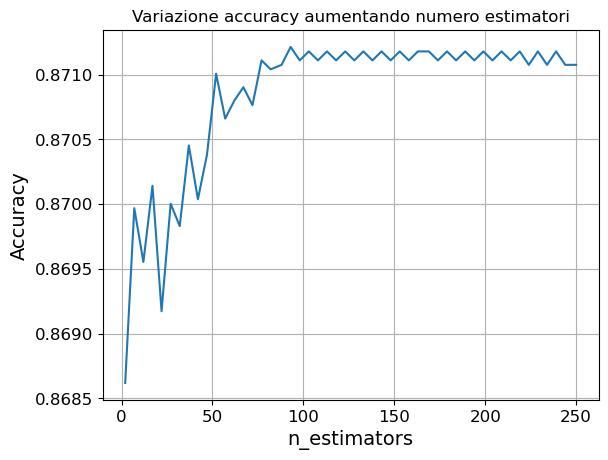

In [23]:
n_estimators = np.linspace(2, 250, 50, dtype=int)

plot_nEstimatorVSaccuracyBoost(n_estimators,  'Variazione accuracy aumentando numero estimatori')

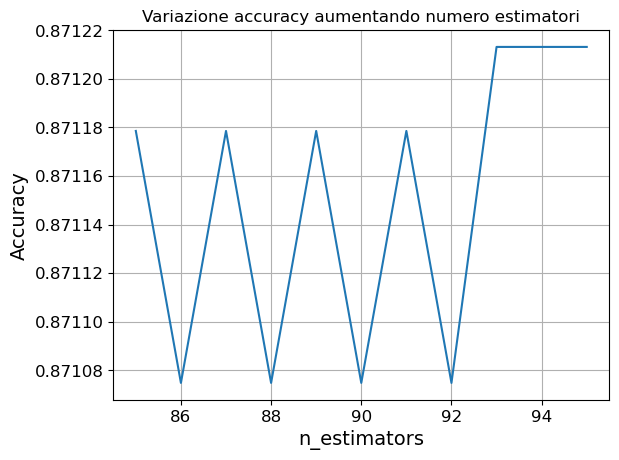

In [33]:
n_estimators = np.linspace(85, 95, 10, dtype=int)

plot_nEstimatorVSaccuracyBoost(n_estimators,  'Variazione accuracy aumentando numero estimatori')

In [35]:

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_stacking_and_plot(learners, i):
  meta_classifier = learners.pop(i)
  stacked_classifier = StackingClassifier(learners, final_estimator = meta_classifier[1])
  learners.insert(i, meta_classifier)
  stacked_classifier.fit(train_data, np.ravel(y_train))
  return stacked_classifier.score(test_data, y_test)

In [37]:
results = []
learners = [
    ('k neighbors', KNeighborsClassifier(n_neighbors=30, p=1, weights='distance')),
    ('random forest', RandomForestClassifier(criterion='gini',max_depth=40, max_features=None, max_leaf_nodes=100,n_estimators=30, n_jobs=-1, random_state=10)),
    ('decision tree', base_estimator),
    ('extra trees', ExtraTreesClassifier(n_jobs=-1, n_estimators=100, criterion='gini', max_features= 'sqrt', random_state=50)),
    ('bagging', BaggingClassifier(estimator=base_estimator, n_estimators=94,
    max_samples=1.0, max_features=0.87, bootstrap=True, oob_score=True, random_state=10, n_jobs=6)),
    ('adaBoost',AdaBoostClassifier(algorithm='SAMME',estimator=base_estimator,learning_rate=0.23, n_estimators=94, random_state=10))
 ]
for i in range(len(learners)):
  test_score = perform_stacking_and_plot(learners, i)
  results.append([learners[i][0], test_score])

scores = pd.DataFrame(results, columns=['Model', 'Testset Score'])

In [38]:
results

[['k neighbors', 0.8697952690551943],
 ['random forest', 0.8722506570756674],
 ['decision tree', 0.8712823350394245],
 ['extra trees', 0.8703831788629133],
 ['bagging', 0.87214690828607],
 ['adaBoost', 0.8712477521095587]]

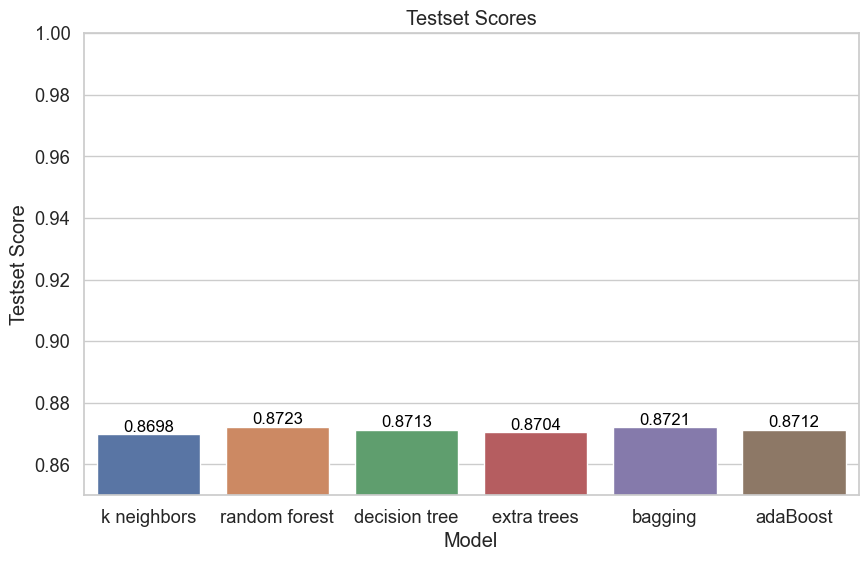

In [44]:
plt.figure(figsize=(10, 6))
plt.ylim([0.85, 1])
plt.title("Testset Scores")

sns.barplot(data=scores, x='Model', y='Testset Score', ax=plt.gca())
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.savefig("stacking_results.png", dpi=400, bbox_inches="tight")
plt.show()